In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
code_files_all = ["relax-sequential.c", "relax-sequential-vec.c", "relax-omp.c", 
                    "relax-omp-vec.c", "relax-mpi.c", "relax-mpi-vec.c"]
code_files_seq = ["relax-omp.c", "relax-omp-vec.c", "relax-mpi.c", "relax-mpi-vec.c"]

def parse_matrix_sizes():
    with open('slurm-output.txt') as file:
        file_contents = file.read()
        lines = file_contents.split("\n");
        
        df_sizes = {}
        
        for file in code_files_all:
            df_sizes[file] = pd.DataFrame(columns=["Matrix size", "Number of cores", "Average runtime"])
            
        line_index = 0
        while line_index < len(lines):
            if "Science Cluster" in lines[line_index]:
                return df_sizes
            elif "Matrix size" in lines[line_index]:
                #Extract the matrix size
                size = lines[line_index].split(":")[1][:-1]
                #print(size)
                
                line_index += 1
                
                cores = 0
                
                while cores != 32:
                    #Extract number of cores
                    while not "Number of cores:" in lines[line_index]:
                        line_index += 1
                    cores = int(''.join(x for x in lines[line_index] if x.isdigit()))
                    line_index += 1

                    #Extract times from all 5 measurements
                    times = {}
                    measurement = 1
                    while measurement < 5:
                        while not "Measurement" in lines[line_index]:
                            line_index += 1
                        measurement = int(''.join(x for x in lines[line_index] if x.isdigit()))
                        line_index += 1
                        #Extract individual times:
                        if cores == 1:
                            for file in code_files_all:
                                while not file in lines[line_index]:
                                    line_index += 1
                                time = int(''.join(x for x in lines[line_index] if x.isdigit()))
                                if file in times.keys():
                                    times[file].append(time)
                                else:
                                    times[file] = [time]
                        else:
                            for file in code_files_seq:
                                while not file in lines[line_index]:
                                    line_index += 1
                                time = int(''.join(x for x in lines[line_index] if x.isdigit()))
                                if file in times.keys():
                                    times[file].append(time)
                                else:
                                    times[file] = [time]

                    #print(times)
                    if cores == 1:
                        for file in code_files_all:
                            df_sizes[file].loc[len(df_sizes[file].index)] = [size,cores,statistics.median(times[file])]
                    else:
                        for file in code_files_seq:
                            df_sizes[file].loc[len(df_sizes[file].index)] = [size,cores,statistics.median(times[file])]
            else:
                line_index += 1

def parse_iterations():
    with open('slurm-output.txt') as file:
        file_contents = file.read()
        lines = file_contents.split("\n");

        df_iterations = {}
        
        for file in code_files_all:
            df_iterations[file] = pd.DataFrame(columns=["Iterations", "Number of cores", "Average runtime"])

        line_index = 0
        while line_index < len(lines):
            if "Science Cluster" in lines[line_index]:
                return df_iterations
            elif "Iterations" in lines[line_index]:
                #Extract the iterations
                iterations = int(''.join(x for x in lines[line_index] if x.isdigit()))
                
                if iterations == 900:
                    return df_iterations
                
                line_index += 1
                
                cores = 0
                
                while cores != 32:
                    #Extract number of cores
                    while not "Number of cores:" in lines[line_index]:
                        line_index += 1
                    cores = int(''.join(x for x in lines[line_index] if x.isdigit()))
                    line_index += 1

                    #Extract times from all 5 measurements
                    times = {}
                    measurement = 1
                    while measurement < 5:
                        while not "Measurement" in lines[line_index]:
                            line_index += 1
                        measurement = int(''.join(x for x in lines[line_index] if x.isdigit()))
                        line_index += 1
                        #Extract individual times:
                        if cores == 1:
                            for file in code_files_all:
                                while not file in lines[line_index]:
                                    line_index += 1
                                    if(line_index == len(lines)):
                                        print(iterations)
                                time = int(''.join(x for x in lines[line_index] if x.isdigit()))
                                if file in times.keys():
                                    times[file].append(time)
                                else:
                                    times[file] = [time]
                        else:
                            for file in code_files_seq:
                                while not file in lines[line_index]:
                                    line_index += 1
                                time = int(''.join(x for x in lines[line_index] if x.isdigit()))
                                if file in times.keys():
                                    times[file].append(time)
                                else:
                                    times[file] = [time]

                    #print(times)
                    if cores == 1:
                        for file in code_files_all:
                            df_iterations[file].loc[len(df_iterations[file].index)] = [iterations,cores,statistics.median(times[file])]
                    else:
                        for file in code_files_seq:
                            df_iterations[file].loc[len(df_iterations[file].index)] = [iterations,cores,statistics.median(times[file])]
            else:
                line_index += 1
                
df_sizes = parse_matrix_sizes()
df_iterations = parse_iterations()
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(df_sizes)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(df_iterations)

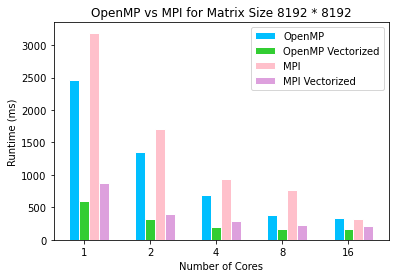

In [4]:
labels = ['1', '2', '4', '8', '16']
x = np.arange(len(labels))
width = 0.15

df_par = df_sizes["relax-omp.c"]
df_par2 = df_sizes["relax-omp-vec.c"]
df_par3 = df_sizes["relax-mpi.c"]
df_par4 = df_sizes["relax-mpi-vec.c"]
omp = [n for n in df_par[df_par["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]
omp_vec = [n for n in df_par2[df_par2["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]
mpi = [n for n in df_par3[df_par3["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]
mpi_vec = [n for n in df_par4[df_par4["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]

num_sizes = 5

bar1 = np.arange(num_sizes)
bar2 = [n + width for n in bar1]
bar3 = [n + width for n in bar2]
bar4 = [n + width for n in bar3]

fig,ax=plt.subplots()
ax.bar(bar1, omp, color = "deepskyblue", width = 0.15, edgecolor='white', label='OpenMP')
ax.bar(bar2, omp_vec, color = "limegreen", width = 0.15, edgecolor='white', label='OpenMP Vectorized')
ax.bar(bar3, mpi, color = "pink", width = 0.15, edgecolor='white', label='MPI')
ax.bar(bar4, mpi_vec, color = "plum", width = 0.15, edgecolor='white', label='MPI Vectorized')

ax.set_ylabel("Runtime (ms)")
ax.set_xlabel("Number of Cores")
ax.set_title('OpenMP vs MPI for Matrix Size 8192 * 8192')
ax.set_xticklabels(labels)

plt.xticks([r + width for r in range(num_sizes)], labels)

plt.legend(loc='upper right')
plt.show()

fig.savefig("omp_mpi.pdf", bbox_inches='tight')

In [12]:
df = pd.DataFrame(columns=df_sizes["relax-sequential.c"]["Matrix size"].values[2:], index=["1 core", "2 cores", "4 cores", "8 cores", "16 cores", "32 cores"])

mbytes = [0.5, 2,8,32,128,512,2048,8192]
counter = 0
n = 256

# This code displays the runtime of MPI vectorized version
# To display another version's runtime: change the name of the file in the brackets below
df_par = df_sizes["relax-mpi-vec.c"]
core1 = [n for n in df_par[df_par["Number of cores"] == 1]["Average runtime"].values[2:]]
core2 = [n for n in df_par[df_par["Number of cores"] == 2]["Average runtime"].values[2:]]
core4 = [n for n in df_par[df_par["Number of cores"] == 4]["Average runtime"].values[2:]]
core8 = [n for n in df_par[df_par["Number of cores"] == 8]["Average runtime"].values[2:]]
core16 = [n for n in df_par[df_par["Number of cores"] == 16]["Average runtime"].values[2:]]
core32 = [n for n in df_par[df_par["Number of cores"] == 32]["Average runtime"].values[2:]]

for size in df.columns:
    df[size]["1 core"] = "{:d}".format(core1[counter]) + "ms"
    df[size]["2 cores"] = "{:d}".format(core2[counter]) + "ms"
    df[size]["4 cores"] = "{:d}".format(core4[counter]) + "ms"
    df[size]["8 cores"] = "{:d}".format(core8[counter]) + "ms"
    df[size]["16 cores"] = "{:d}".format(core16[counter]) + "ms"
    df[size]["32 cores"] = "{:d}".format(core32[counter]) + "ms"
    counter += 1
display(df)

df.to_latex(buf='mpi_vec.tex')

,1024 * 1024,2048 * 2048,4096 * 4096,8192 * 8192,16384 * 16384,32768 * 32768
1 core,8ms,40ms,161ms,872ms,4856ms,20475ms
2 cores,5ms,25ms,101ms,405ms,3706ms,16385ms
4 cores,4ms,18ms,71ms,282ms,2009ms,10090ms
8 cores,3ms,16ms,58ms,230ms,1390ms,6237ms
16 cores,3ms,13ms,53ms,218ms,1245ms,4986ms
32 cores,4ms,13ms,55ms,210ms,1005ms,4957ms


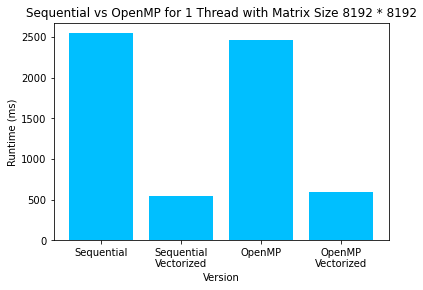

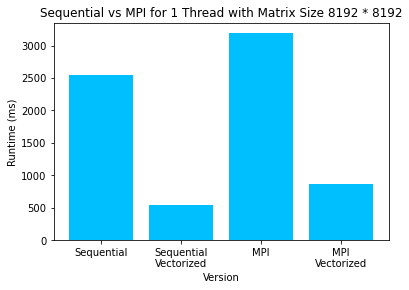

In [7]:
seq = df_sizes["relax-sequential.c"]
seq_vec = df_sizes["relax-sequential-vec.c"]
omp = df_sizes["relax-omp.c"]
omp1 = omp[omp["Number of cores"] == 1]["Average runtime"].values[5]
omp_vec = df_sizes["relax-omp-vec.c"]
omp_vec1 = omp_vec[omp_vec["Number of cores"] == 1]["Average runtime"].values[5]

mpi = df_sizes["relax-mpi.c"]
mpi1 = mpi[mpi["Number of cores"] == 1]["Average runtime"].values[5]
mpi_vec = df_sizes["relax-mpi-vec.c"]
mpi_vec1 = mpi_vec[mpi_vec["Number of cores"] == 1]["Average runtime"].values[5]

fig,ax = plt.subplots()
plt.title("Sequential vs OpenMP for 1 Thread with Matrix Size 8192 * 8192")
x = ['Sequential', 'Sequential\nVectorized', 'OpenMP', 'OpenMP\nVectorized']
y = [int(seq["Average runtime"][5]),int(seq_vec["Average runtime"][5]), int(omp1), int(omp_vec1)]
ax.bar(x,y,color=['deepskyblue', 'deepskyblue', 'deepskyblue', 'deepskyblue'])
plt.xlabel("Version")
plt.ylabel("Runtime (ms)")
plt.show()
fig.savefig("seq_omp.pdf", bbox_inches='tight')

fig,ax = plt.subplots()
plt.title("Sequential vs MPI for 1 Thread with Matrix Size 8192 * 8192")
x = ['Sequential', 'Sequential\nVectorized', 'MPI', 'MPI\nVectorized']
y = [int(seq["Average runtime"][5]),int(seq_vec["Average runtime"][5]), int(mpi1), int(mpi_vec1)]
ax.bar(x,y,color=['deepskyblue', 'deepskyblue', 'deepskyblue', 'deepskyblue'])
plt.xlabel("Version")
plt.ylabel("Runtime (ms)")
plt.show()
fig.savefig("seq_mpi.pdf", bbox_inches='tight')

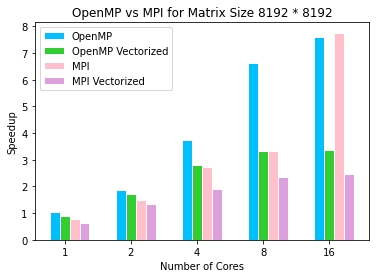

In [8]:
labels = ['1', '2', '4', '8', '16']
x = np.arange(len(labels))
width = 0.15

df_seq = df_sizes["relax-sequential.c"]
df_seq2 = df_sizes["relax-sequential-vec.c"]
df_par = df_sizes["relax-omp.c"]
df_par2 = df_sizes["relax-omp-vec.c"]
df_par3 = df_sizes["relax-mpi.c"]
df_par4 = df_sizes["relax-mpi-vec.c"]
seq = [n for n in df_seq[df_seq["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]
seq_vec = [n for n in df_seq2[df_seq2["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]
omp = [seq[0]/n for n in df_par[df_par["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]
omp_vec = [seq_vec[0]/n for n in df_par2[df_par2["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]
mpi = [seq[0]/n for n in df_par3[df_par3["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]
mpi_vec = [seq_vec[0]/n for n in df_par4[df_par4["Matrix size"] == " 8192 * 8192"]["Average runtime"].values[:5]]

num_sizes = 5

bar1 = np.arange(num_sizes)
bar2 = [n + width for n in bar1]
bar3 = [n + width for n in bar2]
bar4 = [n + width for n in bar3]

fig,ax=plt.subplots()
ax.bar(bar1, omp, color = "deepskyblue", width = 0.15, edgecolor='white', label='OpenMP')
ax.bar(bar2, omp_vec, color = "limegreen", width = 0.15, edgecolor='white', label='OpenMP Vectorized')
ax.bar(bar3, mpi, color = "pink", width = 0.15, edgecolor='white', label='MPI')
ax.bar(bar4, mpi_vec, color = "plum", width = 0.15, edgecolor='white', label='MPI Vectorized')

ax.set_ylabel("Speedup")
ax.set_xlabel("Number of Cores")
ax.set_title('OpenMP vs MPI for Matrix Size 8192 * 8192')
ax.set_xticklabels(labels)

plt.xticks([r + width for r in range(num_sizes)], labels)

plt.legend(loc='upper left')
plt.show()

fig.savefig("speedup.pdf", bbox_inches='tight')

In [11]:
sequential = pd.DataFrame(columns=df_sizes["relax-sequential-vec.c"]["Matrix size"].values[2:], index=["1 core", "2 cores", "4 cores", "8 cores", "16 cores", "32 cores"])
df_seq = df_sizes["relax-sequential.c"]
df_seq2 = df_sizes["relax-sequential-vec.c"]
df_par = df_sizes["relax-omp.c"]
df_par2 = df_sizes["relax-omp-vec.c"]
df_par3 = df_sizes["relax-mpi.c"]
df_par4 = df_sizes["relax-mpi-vec.c"]

seq = [n for n in df_seq[(df_seq["Matrix size"] != " 256 * 256") & (df_seq["Matrix size"] != " 512 * 512")]["Average runtime"]]
seq_vec = [n for n in df_seq2[(df_seq2["Matrix size"] != " 256 * 256") & (df_seq2["Matrix size"] != " 512 * 512")]["Average runtime"]]

calc = []
# This code calculates the speedup of MPI unoptimized version
# To calculate another version's speedup: change the number X in "df_parX" to the corresponding one
# If calculating for an unoptimized version: use "seq[i]", otherwise use "seq_vec[i]"
for n in df_par3[(df_par3["Matrix size"] == " 1024 * 1024")]["Average runtime"]:
    calc.append(seq[0]/n)
for n in df_par3[(df_par3["Matrix size"] == " 2048 * 2048")]["Average runtime"]:
    calc.append(seq[1]/n)
for n in df_par3[(df_par3["Matrix size"] == " 4096 * 4096")]["Average runtime"]:
    calc.append(seq[2]/n)
for n in df_par3[(df_par3["Matrix size"] == " 8192 * 8192")]["Average runtime"]:
    calc.append(seq[3]/n)
for n in df_par3[(df_par3["Matrix size"] == " 16384 * 16384")]["Average runtime"]:
    calc.append(seq[4]/n)
for n in df_par3[(df_par3["Matrix size"] == " 32768 * 32768")]["Average runtime"]:
    calc.append(seq[5]/n)

counter = 0
for size in sequential.columns:
    for cores in sequential[size].index:
        sequential[size][cores] = "{:.2f}".format(float(calc[counter]))
        counter += 1
display(sequential)

sequential.to_latex(buf='mpi.tex')

,1024 * 1024,2048 * 2048,4096 * 4096,8192 * 8192,16384 * 16384,32768 * 32768
1 core,0.98,0.77,0.86,0.80,0.80,0.84
2 cores,1.90,1.43,1.72,1.49,1.44,1.49
4 cores,3.44,2.40,2.96,2.71,2.76,2.53
8 cores,4.23,2.84,4.42,3.34,4.51,4.61
16 cores,6.88,5.20,6.91,7.77,5.15,6.91
32 cores,6.11,5.78,7.15,7.96,6.43,6.73


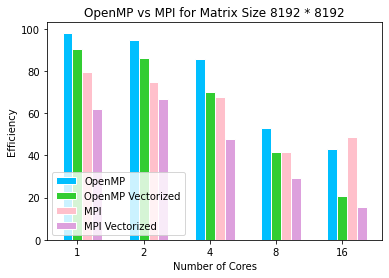

In [10]:
labels = ['1', '2', '4', '8', '16']
cores = [1,2,4,8,16]
x = np.arange(len(labels))
width = 0.15

df_seq_eff = df_sizes["relax-sequential.c"]
df_seq2 = df_sizes["relax-sequential-vec.c"]
df_par = df_sizes["relax-omp.c"]
df_par2 = df_sizes["relax-omp-vec.c"]
df_par3 = df_sizes["relax-mpi.c"]
df_par4 = df_sizes["relax-mpi-vec.c"]
omp_eff = []
omp_vec_eff = []
mpi_eff = []
mpi_vec_eff = []

i = 0
for c in cores:
    omp_eff.append(float(omp[i]/c)*100)
    omp_vec_eff.append(float(omp_vec[i]/c)*100)
    mpi_eff.append(float(mpi[i]/c)*100)
    mpi_vec_eff.append(float(mpi_vec[i]/c)*100)
    i+=1

num_sizes = 5

bar1 = np.arange(num_sizes)
bar2 = [n + width for n in bar1]
bar3 = [n + width for n in bar2]
bar4 = [n + width for n in bar3]

fig,ax=plt.subplots()
ax.bar(bar1, omp_eff, color = "deepskyblue", width = 0.15, edgecolor='white', label='OpenMP')
ax.bar(bar2, omp_vec_eff, color = "limegreen", width = 0.15, edgecolor='white', label='OpenMP Vectorized')
ax.bar(bar3, mpi_eff, color = "pink", width = 0.15, edgecolor='white', label='MPI')
ax.bar(bar4, mpi_vec_eff, color = "plum", width = 0.15, edgecolor='white', label='MPI Vectorized')

ax.set_ylabel("Efficiency")
ax.set_xlabel("Number of Cores")
ax.set_title('OpenMP vs MPI for Matrix Size 8192 * 8192')
ax.set_xticklabels(labels)

plt.xticks([r + width for r in range(num_sizes)], labels)

plt.legend(loc='lower left')
plt.show()

fig.savefig("efficiency.pdf", bbox_inches='tight')